In [1]:
 s = '''hello. how are you?
 good
 so what'''

In [2]:
s.split(' ')

['hello.', 'how', 'are', 'you?\ngood\nso', 'what']

In [3]:
s.split()

['hello.', 'how', 'are', 'you?', 'good', 'so', 'what']

# Data Tables and Transforms
by Chris North, Virginia Tech

Also: python Pandas

Data files used:  Counties2010.csv, States2010.csv


## Tools:  Pandas

Data Table = `pandas.DataFrame`
* `conda install pandas`
* or check Anaconda Navigator | Environments | Installed

Python Pandas reference:
* Pandas library: http://pandas.pydata.org
* Pandas cheat sheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* NumPy library: http://www.numpy.org
* Pandas for Everyone, Chapter 2, Chapter 4 (union, join), Chapter 9 (apply), Chapter 10 (groupby)
* Python for Data Analysis, Chapter 5, Chapter 9 (Groupby)

In [4]:
import pandas

In [5]:
pandas._version.get_versions()

{'date': '2022-04-02T08:46:16+0100',
 'dirty': False,
 'error': None,
 'full-revisionid': '4bfe3d07b4858144c219b9346329027024102ab6',
 'version': '1.4.2'}

In [6]:
pandas.__version__

'1.4.2'

## Data table

* table, rows (axis=0), columns (axis=1), values
* n = cardinality (rows)
* p = dimensionality (columns)
* row labels (index but not index!?!)
* column names
* CSV files
* data types:
    * numeric: int, float
    * categorical, nominal:  string (object)

![](https://i.imgur.com/zfxLzEv.png)

In [7]:
dt = pandas.read_csv('Counties2010.csv')
dt

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84
...,...,...,...,...,...,...,...,...,...
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38
3142,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26
3143,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55
3144,Weston,WY,7208,6644,41992,19.3,388,25.3,2398.09


In [8]:
type(dt)

pandas.core.frame.DataFrame

In [9]:
r_num, cc_num = dt.shape
print (r_num, cc_num)

3146 9


In [10]:
dt.columns

Index(['Name', 'State', 'Population', 'Pop2000', 'IncomePerCapita',
       'PercentCollegeGrad', 'MedianRent', 'CommuteTime', 'LandArea'],
      dtype='object')

In [11]:
dt.describe()

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
count,3.146000e+03,3.146000e+03,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000
mean,9.813908e+04,8.945388e+04,30019.454228,18.685251,453.595041,22.597934,1122.665928
std,3.127666e+05,2.922515e+05,8662.018820,8.524617,183.416560,5.546780,3609.862020
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.106600e+04,1.108125e+04,25343.750000,12.900000,332.000000,18.900000,430.610000
50%,2.583700e+04,2.454400e+04,28903.000000,16.600000,409.000000,22.300000,615.380000
75%,6.652800e+04,6.172775e+04,33363.250000,22.000000,523.000000,26.100000,923.772500
max,9.818605e+06,9.519338e+06,132728.000000,69.500000,2001.000000,42.500000,145504.790000


In [12]:
dt.dtypes

Name                   object
State                  object
Population              int64
Pop2000                 int64
IncomePerCapita         int64
PercentCollegeGrad    float64
MedianRent              int64
CommuteTime           float64
LandArea              float64
dtype: object

In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                3146 non-null   object 
 1   State               3146 non-null   object 
 2   Population          3146 non-null   int64  
 3   Pop2000             3146 non-null   int64  
 4   IncomePerCapita     3146 non-null   int64  
 5   PercentCollegeGrad  3146 non-null   float64
 6   MedianRent          3146 non-null   int64  
 7   CommuteTime         3146 non-null   float64
 8   LandArea            3146 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 221.3+ KB


In [14]:
pandas.options.display.min_rows = 50
pandas.reset_option('display.min_rows')
dt

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84
...,...,...,...,...,...,...,...,...,...
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38
3142,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26
3143,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55
3144,Weston,WY,7208,6644,41992,19.3,388,25.3,2398.09


In [15]:
pandas.describe_option('display')

display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [default: 12] [currently: 12]
display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]
display.date_yearfirst : boolean
    When True, prints and parses dates with the year first, eg 2005/01/20
    [default: False] [currently: False]
display.encoding : str/unicode
    Defaults to the detected encoding of the console.
    Specifies the encoding to be used for strings returned by to_string,
    these are generally strings meant to be displayed on the console.
    [default: UTF-8] [curr

## Data table transforms

* [Slice](#Slice)
* [Reduce](#Reduce)
* [Map](#Map)
* [Filter](#Filter)
* [Sort](#Sort)
* [Groupby](#GroupBy)
* [Union](#Union)
* [Join](#Join)


In [16]:
dt.columns

Index(['Name', 'State', 'Population', 'Pop2000', 'IncomePerCapita',
       'PercentCollegeGrad', 'MedianRent', 'CommuteTime', 'LandArea'],
      dtype='object')

### Sort

* `d.sort_values(columnName)`
* table or column

Example: Which counties have the highest PercentCollegeGrad?

In [17]:
ds = dt.sort_values('IncomePerCapita', ascending=False)
ds

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38
2011,New York,NY,1585873,1537195,120790,57.7,1121,30.3,22.83
2673,Loving,TX,82,67,99593,36.4,0,24.3,668.93
293,Pitkin,CO,17148,14872,93465,59.1,1120,19.0,970.70
206,Marin,CA,252409,247289,91483,53.9,1406,28.4,520.31
...,...,...,...,...,...,...,...,...,...
2877,Lexington,VA,7042,6867,0,47.6,560,13.1,2.50
2881,Lynchburg,VA,75568,65269,0,28.1,491,16.4,49.13
2883,Manassas,VA,37821,35135,0,27.7,1083,32.0,9.88
547,Kalawao,HI,90,147,0,25.6,2001,5.7,11.99


### Slice

* `d.columnName`
* `d.iloc[r:r, c:c]`
* iloc vs loc
    * iloc indexes by the current table order
    * loc uses row labels

In [18]:
dt.PercentCollegeGrad

0       12.5
1        8.5
2       32.3
3       14.4
4       14.2
        ... 
3141    49.5
3142    17.3
3143    24.5
3144    19.3
3145    47.1
Name: PercentCollegeGrad, Length: 3146, dtype: float64

In [19]:
type(dt.PercentCollegeGrad)

pandas.core.series.Series

In [20]:
dt.iloc[:,2:]

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,3141,2697,28942,12.5,475,4.5,6981.94
1,5561,5465,33318,8.5,1050,4.9,4390.28
2,291826,260283,46243,32.3,921,18.0,1704.68
3,17013,16006,26990,14.4,845,6.7,40570.00
4,997,1258,48747,14.2,687,9.2,503.84
...,...,...,...,...,...,...,...
3141,21294,18251,132728,49.5,870,15.9,3995.38
3142,21118,19742,42621,17.3,437,20.6,2081.26
3143,8533,8289,40781,24.5,369,12.3,2238.55
3144,7208,6644,41992,19.3,388,25.3,2398.09


In [21]:
ds.iloc[5:10, 0:2]

,Name,State
308,Fairfield,CT
2040,Westchester,NY
226,San Mateo,CA
1923,Morris,NJ
223,San Francisco,CA


In [22]:
ds.loc[0]

Name                  Aleutians East
State                             AK
Population                      3141
Pop2000                         2697
IncomePerCapita                28942
PercentCollegeGrad              12.5
MedianRent                       475
CommuteTime                      4.5
LandArea                     6981.94
Name: 0, dtype: object

In [23]:
ds.iloc[0]

Name                    Teton
State                      WY
Population              21294
Pop2000                 18251
IncomePerCapita        132728
PercentCollegeGrad       49.5
MedianRent                870
CommuteTime              15.9
LandArea              3995.38
Name: 3141, dtype: object

### Reduce

* column->scalar:  `d.col.func`, `func(d.col)`
* table->row:  `d.func(axis=0)`
* table->col:  `d.func(axis=1)`

Examples: What is the mean PercentCollegeGrad?  Which county has the highest IncomePerCapita?

In [24]:
dt.Population.mean()

98139.07755880483

In [25]:
import numpy
numpy.mean(dt.Population)

98139.07755880483

In [26]:
dt.mean(axis=1)

C:\Users\Jeff Chen\AppData\Local\Temp\ipykernel_4536\3600058843.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dt.mean(axis=1)


0         6036.277143
1         7113.954286
2        85861.140000
3        14492.157143
4         7459.462857
            ...      
3141     25314.825714
3142     12291.022857
3143      8606.764286
3144      8382.098571
3145    176755.078571
Length: 3146, dtype: float64

In [27]:
## Exercise: County name with max IncomePerCapita?
dt.loc[dt.IncomePerCapita.idxmax()]

Name                    Teton
State                      WY
Population              21294
Pop2000                 18251
IncomePerCapita        132728
PercentCollegeGrad       49.5
MedianRent                870
CommuteTime              15.9
LandArea              3995.38
Name: 3141, dtype: object

### Map

* col &rarr; col: `d.col.map(func)` where func:scalar &rarr; scalar
* cols &rarr; col:  `d.col1 + d.col2`  (column math)
* table &rarr; table:  `d.applymap(func)`  where func:scalar &rarr; scalar
* table &rarr; (table or col or row):  `d.apply(func, axis)`
    * axis=0:  func:col &rarr; (col or scalar)
    * axis=1:  func:row &rarr; (row or scalar)
* [broadcasting element-wise operations](#Map-with-Broadcasting)


Example: how many college grads in each county?


In [28]:
dt['CollegeGrad'] = dt.Population * dt.PercentCollegeGrad / 100.0
dt

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,392.625
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,472.685
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,94259.798
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2449.872
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,141.574
...,...,...,...,...,...,...,...,...,...,...
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38,10540.530
3142,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26,3653.414
3143,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55,2090.585
3144,Weston,WY,7208,6644,41992,19.3,388,25.3,2398.09,1391.144


In [29]:
dt['CollegeGrad'] = dt['CollegeGrad'].map(int)
dt

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,392
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,472
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,94259
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2449
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,141
...,...,...,...,...,...,...,...,...,...,...
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38,10540
3142,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26,3653
3143,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55,2090
3144,Weston,WY,7208,6644,41992,19.3,388,25.3,2398.09,1391


### Filter

* n rows &rarr; fewer rows
* `d[ cond(d.col) ]`

Examples: Which counties are in VA? Find the college towns?

In [30]:
# State == 'VA'
dt[dt.State == 'VA']

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
2806,Accomack,VA,33164,38305,24342,17.8,444,19.8,449.50,5903
2807,Albemarle,VA,98970,79236,45275,52.5,850,21.3,720.70,51959
2808,Alexandria,VA,139966,128283,70632,59.0,1222,29.0,15.03,82579
2809,Alleghany,VA,16250,12926,27793,15.3,297,25.2,445.46,2486
2810,Amelia,VA,12690,11400,32228,9.6,561,33.7,355.27,1218
...,...,...,...,...,...,...,...,...,...,...
2937,Williamsburg,VA,14068,11998,0,48.3,819,18.8,9.02,6794
2938,Winchester,VA,26203,23585,0,28.1,717,20.4,9.23,7363
2939,Wise,VA,41452,40123,26219,11.9,357,23.2,403.19,4932
2940,Wythe,VA,29235,27599,26287,14.4,384,21.7,461.82,4209


In [31]:
len(dt[dt.State == 'VA'])

136

In [32]:
## Exercise:  find the college towns?

dt[(dt.PercentCollegeGrad > 30) & (dt.Population < 100000) & (dt.IncomePerCapita < 50000)]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
8,Haines,AK,2508,2392,46772,36.2,627,14.6,2318.60,907
10,Juneau,AK,31275,30711,44723,35.8,923,15.6,2701.93,11196
22,Skagway,AK,968,0,0,31.0,852,4.4,452.33,300
214,Nevada,CA,98764,92033,42671,32.4,960,24.4,957.77,31999
247,Archuleta,CO,12084,9898,26343,35.1,608,20.3,1350.18,4241
...,...,...,...,...,...,...,...,...,...,...
2974,Kittitas,WA,40915,33362,28841,31.0,654,20.3,2297.27,12683
2993,Whitman,WA,44776,40740,25087,44.8,556,15.2,2159.09,20059
3054,St. Croix,WI,84345,63155,36543,32.1,694,26.7,722.33,27074
3097,Monongalia,WV,96189,81866,33408,34.3,504,21.2,360.06,32992


##  Exercises

* What is the Population of the US?
* What is the IncomePerCapita of the US?

In [33]:
dt.Population.sum()

308745538

In [34]:
dt.IncomePerCapita.mean()
# 1 100
# 100 1
# => (100 + 1) / 2 = 50.5
# Wrong

30019.45422759059

In [35]:
(dt.IncomePerCapita * dt.Population).sum() / dt.Population.sum()

38513.65864771785

## loc vs. iloc
* row
* column
* map
* filter

In [36]:
dt

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,392
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,472
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,94259
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2449
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,141
...,...,...,...,...,...,...,...,...,...,...
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38,10540
3142,Uinta,WY,21118,19742,42621,17.3,437,20.6,2081.26,3653
3143,Washakie,WY,8533,8289,40781,24.5,369,12.3,2238.55,2090
3144,Weston,WY,7208,6644,41992,19.3,388,25.3,2398.09,1391


In [37]:
dt.iloc[:10]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,392
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,472
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,94259
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2449
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,141
5,Denali,AK,1826,1893,50465,24.6,419,11.9,12751.41,449
6,Dillingham,AK,4847,4922,33380,20.5,819,8.7,18568.78,993
7,Fairbanks North Star,AK,97581,82840,34960,26.3,845,17.4,7338.21,25663
8,Haines,AK,2508,2392,46772,36.2,627,14.6,2318.60,907
9,Hoonah-Angoon,AK,2150,3436,39906,22.5,419,9.1,7524.92,483


In [38]:
dt.loc[:10]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,CollegeGrad
0,Aleutians East,AK,3141,2697,28942,12.5,475,4.5,6981.94,392
1,Aleutians West,AK,5561,5465,33318,8.5,1050,4.9,4390.28,472
2,Anchorage,AK,291826,260283,46243,32.3,921,18.0,1704.68,94259
3,Bethel,AK,17013,16006,26990,14.4,845,6.7,40570.00,2449
4,Bristol Bay,AK,997,1258,48747,14.2,687,9.2,503.84,141
5,Denali,AK,1826,1893,50465,24.6,419,11.9,12751.41,449
6,Dillingham,AK,4847,4922,33380,20.5,819,8.7,18568.78,993
7,Fairbanks North Star,AK,97581,82840,34960,26.3,845,17.4,7338.21,25663
8,Haines,AK,2508,2392,46772,36.2,627,14.6,2318.60,907
9,Hoonah-Angoon,AK,2150,3436,39906,22.5,419,9.1,7524.92,483


In [39]:
ds.iloc[:10]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38
2011,New York,NY,1585873,1537195,120790,57.7,1121,30.3,22.83
2673,Loving,TX,82,67,99593,36.4,0,24.3,668.93
293,Pitkin,CO,17148,14872,93465,59.1,1120,19.0,970.70
206,Marin,CA,252409,247289,91483,53.9,1406,28.4,520.31
308,Fairfield,CT,916829,882567,81576,43.4,987,28.2,624.89
2040,Westchester,NY,949113,923459,74878,44.4,1062,31.6,430.50
226,San Mateo,CA,718451,707161,71753,43.6,1332,25.0,448.41
1923,Morris,NJ,492276,470212,71713,48.1,1096,29.3,460.18
223,San Francisco,CA,805235,776733,71342,51.1,1220,29.1,46.87


In [40]:
ds.loc[:10]

,Name,State,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
3141,Teton,WY,21294,18251,132728,49.5,870,15.9,3995.38
2011,New York,NY,1585873,1537195,120790,57.7,1121,30.3,22.83
2673,Loving,TX,82,67,99593,36.4,0,24.3,668.93
293,Pitkin,CO,17148,14872,93465,59.1,1120,19.0,970.70
206,Marin,CA,252409,247289,91483,53.9,1406,28.4,520.31
...,...,...,...,...,...,...,...,...,...
1331,Dakota,MN,398552,355904,45045,37.9,814,23.7,562.17
1904,Grafton,NH,89118,81743,44894,34.6,723,20.8,1708.75
1207,Queen Anne's,MD,47798,40563,44882,28.0,719,34.2,371.91
1760,Burke,ND,1968,2242,44732,16.6,276,18.5,1103.57


In [41]:
ds.iloc[:10, :5]

,Name,State,Population,Pop2000,IncomePerCapita
3141,Teton,WY,21294,18251,132728
2011,New York,NY,1585873,1537195,120790
2673,Loving,TX,82,67,99593
293,Pitkin,CO,17148,14872,93465
206,Marin,CA,252409,247289,91483
308,Fairfield,CT,916829,882567,81576
2040,Westchester,NY,949113,923459,74878
226,San Mateo,CA,718451,707161,71753
1923,Morris,NJ,492276,470212,71713
223,San Francisco,CA,805235,776733,71342


In [42]:
ds.loc[:10, :5]

TypeError: cannot do slice indexing on Index with these indexers [5] of type int

In [ ]:
ds.loc[:10, 'Name':'IncomePerCapita']

In [ ]:
ds

In [ ]:
ds['NewColumn'] = dt.IncomePerCapita * dt.Population
ds

In [ ]:
dt[dt.IncomePerCapita > 80000]

In [ ]:
dt.loc[dt.IncomePerCapita > 80000]

## Map with Broadcasting

Broadcasting element-wise operations:
* scalar, row, column, table
* table + scalar = add scalar to each value
* table + row = add row to each table row
* table + col = add col to each table col
* table + table = add corresponding cells

In [ ]:
dn = ds.iloc[:,2:]
dn

In [ ]:
## table + scalar
dn * 10

In [ ]:
## table + row
dn * [1, 2, 3, 4, 5, 6, 7, 10]

In [ ]:
## table + table
dn - dn

## Exercises

zscore(x) = (x - mean) / stdev

* Zscore normalize Population column?
* Zscore normalize all columns in the table?


In [ ]:
dt.Population.mean(), dt.Population.std()

In [ ]:
(dt.Population - dt.Population.mean()) / dt.Population.std()

In [ ]:
dt.std()

In [ ]:
dz = (dt - dt.mean()) / dt.std()
dz.describe()

## More Transforms...

### GroupBy

* n rows &rarr; few aggregated rows
* Steps:
    1. Group (split) by a categorical (key) column
         * `g = d.groupby('categorical_column')`
    2. Reduce (apply) each group, then combine the reductions into a table
         * `g.mean()`
* Binning: quantitative column &rarr; categorical column

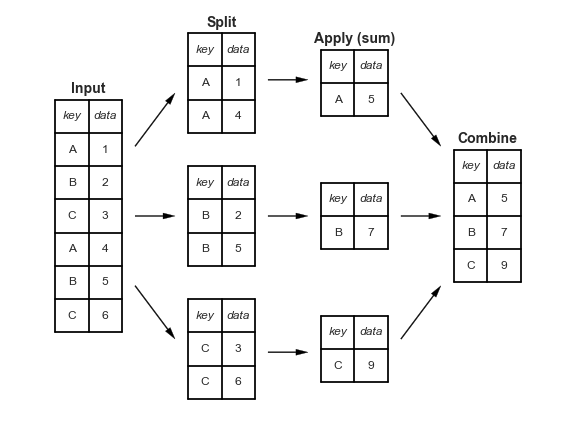

Examples:  What is the population of each state?  Distribution of county incomes?

In [ ]:
###
import pandas
c = pandas.read_csv("data/Counties2010.csv")
c

In [ ]:
## First step: group by categorical column
g = c.groupby('State')

In [ ]:
g.size()

In [ ]:
len(g)

In [ ]:
g.sum()

In [ ]:
## Second step: reduce other columns


In [ ]:
g.Population.sum()

In [ ]:
import numpy
g.aggregate({'Population': sum, 'IncomePerCapita': numpy.mean})

In [ ]:
## Binning: create categorical col from quantitative col
# Distribution of county incomes?


In [ ]:
c['bin'] = (c.IncomePerCapita / 10000).map(int)
c.head()

In [ ]:
c.groupby('bin').size()

In [ ]:
c.IncomePerCapita.median()

In [ ]:
g.MedianRent.mean()

## Multi-Table Transforms

Combine tables vertically or horizontally?


### Union
* combine tables vertically
* table(n rows) union table(m rows) &rarr; table(n+m rows)
* matching columns
* `d1.append(d2)` or `pandas.concat([d1, d2, d3])`
* https://pandas.pydata.org/docs/user_guide/merging.html#concatenating-objects
* https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

![](https://pandas.pydata.org/docs/_images/merging_concat_basic.png)


In [ ]:
s = pandas.read_csv("data/States2010.csv")
s.head()

In [ ]:
c.head()

In [ ]:
# u = c.append(s)
u = pandas.concat([c,s])
u.head()

In [ ]:
u.shape, c.shape, s.shape

In [ ]:
u

### Join
* combine tables horizontally
* table(p cols) join table(q cols) &rarr; table (p+q cols)
* matching rows, requires *keys* for matching
* `pandas.merge(left, right, how, left_on, right_on)`
    * left_on = key column in left table
    * right_on = key column in right table
* https://pandas.pydata.org/docs/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging

![](https://pandas.pydata.org/docs/_images/merging_merge_on_key.png)

#### Duplicate key values?

Join types:
* “one_to_one” or “1:1”: merge keys are unique in both left and right datasets.
* “one_to_many” or “1:m”: merge keys are unique in left dataset, 'foriegn key' on right
* “many_to_one” or “m:1”: merge keys are unique in right dataset, 'foriegn key' on left
* “many_to_many” or “m:m”: full cartesian product.
* https://pandas.pydata.org/docs/user_guide/merging.html#brief-primer-on-merge-methods-relational-algebra

#### Missing key values?
* how = merge method for missing keys
* https://pandas.pydata.org/docs/user_guide/merging.html#brief-primer-on-merge-methods-relational-algebra

<table class="colwidths-given table">
<colgroup>
<col style="width: 20%">
<col style="width: 20%">
<col style="width: 60%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Merge method</p></th>
<th class="head"><p>SQL Join Name</p></th>
<th class="head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">left</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">LEFT</span> <span class="pre">OUTER</span> <span class="pre">JOIN</span></code></p></td>
<td><p>Use keys from left frame only</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">right</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">RIGHT</span> <span class="pre">OUTER</span> <span class="pre">JOIN</span></code></p></td>
<td><p>Use keys from right frame only</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">outer</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">FULL</span> <span class="pre">OUTER</span> <span class="pre">JOIN</span></code></p></td>
<td><p>Use union of keys from both frames</p></td>
</tr>
<tr class="row-odd"><td><p><code class="docutils literal notranslate"><span class="pre">inner</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">INNER</span> <span class="pre">JOIN</span></code></p></td>
<td><p>Use intersection of keys from both frames</p></td>
</tr>
<tr class="row-even"><td><p><code class="docutils literal notranslate"><span class="pre">cross</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">CROSS</span> <span class="pre">JOIN</span></code></p></td>
<td><p>Create the cartesian product of rows of both frames</p></td>
</tr>
</tbody>
</table>

Example: How do county rents differ from their state rents?


In [ ]:
j = pandas.merge(s, c, 
                 how='inner', left_on='Abbrev', right_on='State', 
                 suffixes=('_s', '_c'))


In [ ]:
j.shape, s.shape, c.shape

In [ ]:
j

In [ ]:
## how do county rents differ from their state rents?
j['C_S_RentDiff'] = j.MedianRent_c - j.MedianRent_s

In [ ]:
j.loc[:, ['Name_s', 'Name_c', 'C_S_RentDiff']]

In [ ]:
j['C_S_RentDiff']

In [ ]:
j

In [ ]:
j.iloc[:, [0,2,3,4,5]]